<a href="https://colab.research.google.com/github/Ign4cho/ProyectoBI/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
Carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os
#os.path()
csv_path = os.path.join("datasets","EXTRACCION_Prov-San-Juan_022024.csv")


In [7]:
column_types = {
            'CODIGOENTIDAD': 'float64',
            'IDLINEA': 'float64',
            'NROCHIP': 'float64',
            'NROTARJETA': 'float64',
            'CODIGOCONTRATO': 'float64',
            'SECUENCIA_TARJETA': 'float64',
            'FECHATRX': 'string',
            'MONTO': 'float64',
            'SALDO': 'float64',
            'VALOR_TARIFA': 'float64',
            'INTERNO': 'float64',
            'DISPOSITIVO': 'float64',
            'SECTERMINAL': 'float64',
            'CODIGOTIPOTRX': 'float64',
            'CODIGOSUBTIPOTRX': 'float64',
            'TIPOMAPPING': 'float64',
            'ENTIDAD_EMISORA_TARJ': 'float64',
            'CODIGOERROR': 'float64',
            'FECHAPROCESO': 'string',
            'RAMAL': 'float64',
            'IDARCHIVOINTERCAMBIO': 'float64',
            'CODIGOROL': 'string',
            'CODIGOTIPOTARJETA': 'float64',
            'SENTIDO': 'string',
            'MONEDERO_ID': 'float64',
            'EMISOR_CONTRATO': 'float64',
            'SAM_ID': 'string',
            'LG_ID': 'float64',
            'TIPO_TERMINAL': 'float64',
            'ID_SERVICIO': 'float64',
            'VERSION_TIPO_TRX': 'float64',
            'ID_INTEGRADOR': 'float64',
            'EMISOR_MONEDERO': 'float64',
            'SECCION_FIN': 'float64',
            'SECCION_INICIO': 'float64',
            'DESCUENTO': 'float64',
            'PROVISION': 'float64',
            'ID_POSICIONAMIENTO': 'float64',
            'PTC': 'float64',
            'LTC': 'float64'
        }

In [8]:
def load_data(path, columns):
    return pd.read_csv(path, delimiter=';', decimal=',',
                          dtype=columns)
    #si hace falta agregar: nrows=cantidad_filas,


In [9]:
complete_df=load_data(csv_path, column_types)

In [ ]:
joblib_path = os.path.join('datasets', 'joblib', 'extraccion022024.pkl')
complete_df= joblib.load(joblib_path)

In [ ]:
file_path = os.path.join('datasets', 'joblib', 'extraccion022024.pkl')
joblib.dump(complete_df, file_path)

['datasets/joblib/extraccion022024.pkl']

In [10]:
selected_columns = ['CODIGOENTIDAD', 'IDLINEA', 'NROTARJETA', 'CODIGOCONTRATO',
                            'FECHATRX','CODIGOTIPOTRX','RAMAL','ID_POSICIONAMIENTO','ID_COMBINACION']
selected_df = complete_df[selected_columns]
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569627 entries, 0 to 5569626
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CODIGOENTIDAD       float64
 1   IDLINEA             float64
 2   NROTARJETA          float64
 3   CODIGOCONTRATO      float64
 4   FECHATRX            string 
 5   CODIGOTIPOTRX       float64
 6   RAMAL               float64
 7   ID_POSICIONAMIENTO  float64
 8   ID_COMBINACION      float64
dtypes: float64(8), string(1)
memory usage: 382.4 MB


# Comentarios

## Describe e Info
La mayoría de los valores no son necesariamente numéricos, pero vemos que la mayoría son non-null por lo menos.

In [11]:
selected_df.head()

,CODIGOENTIDAD,IDLINEA,NROTARJETA,CODIGOCONTRATO,FECHATRX,CODIGOTIPOTRX,RAMAL,ID_POSICIONAMIENTO,ID_COMBINACION
0,525.0,3348.0,1.812366e+09,621.0,15/02/2024 07:16:04,12.0,7533.0,19.0,NaN
1,525.0,3348.0,1.816309e+09,602.0,15/02/2024 07:17:59,12.0,7533.0,19.0,NaN
2,525.0,3348.0,1.851616e+09,602.0,15/02/2024 08:20:01,12.0,7533.0,35.0,NaN
3,525.0,3348.0,1.851790e+09,621.0,15/02/2024 08:20:59,12.0,7533.0,35.0,NaN
4,525.0,3348.0,1.826845e+09,621.0,15/02/2024 09:25:11,12.0,7533.0,51.0,NaN


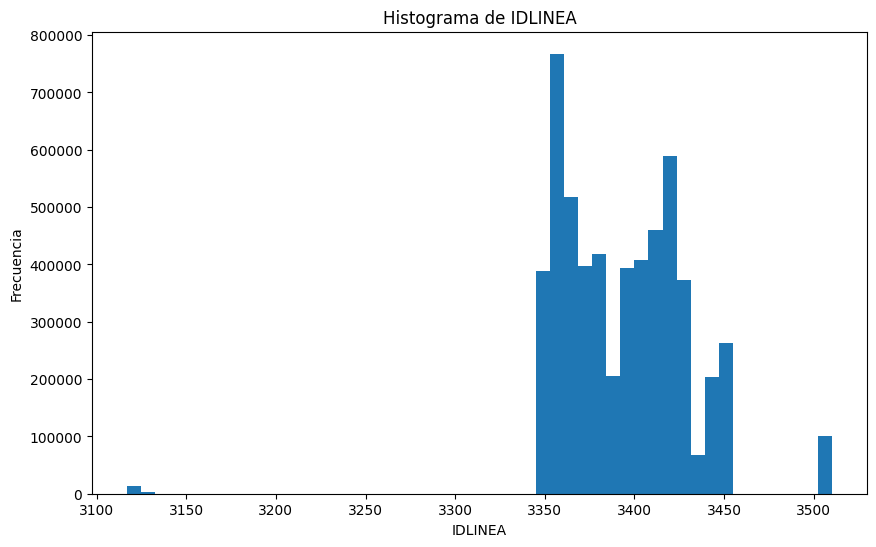

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(selected_df['IDLINEA'], bins=50) 
plt.xlabel('IDLINEA')
plt.ylabel('Frecuencia')
plt.title('Histograma de IDLINEA')
plt.show()


In [28]:

idlinea_counts = selected_df['IDLINEA'].value_counts()
print(idlinea_counts)
print(f'cantidad de lineas distintas: {len(idlinea_counts)}')

IDLINEA
3359.0    307541
3367.0    288605
3451.0    247735
3360.0    168075
3426.0    165754
           ...  
3117.0       562
3118.0       226
3427.0       114
3127.0        13
3438.0        10
Name: count, Length: 119, dtype: int64
cantidad de lineas distintas: 119


descipción de IDLNEA en tablas:
>120 códigos de lineas (numérico) 
>(nro de linea) (DESCRIPCION EN TABLA DE LINEAS)

son correctos los valores, hay que verpor donde van las lineas

# Visualizaciones
Vamos a probar algunas visualizaciones
Primero vamos a ver de Codigotipotrx que es el codigo tipo transacción. Según el excel tiene dos valores posibles: 12 y 22.
Después anazlizamos también el ID_COMBINACIÓN

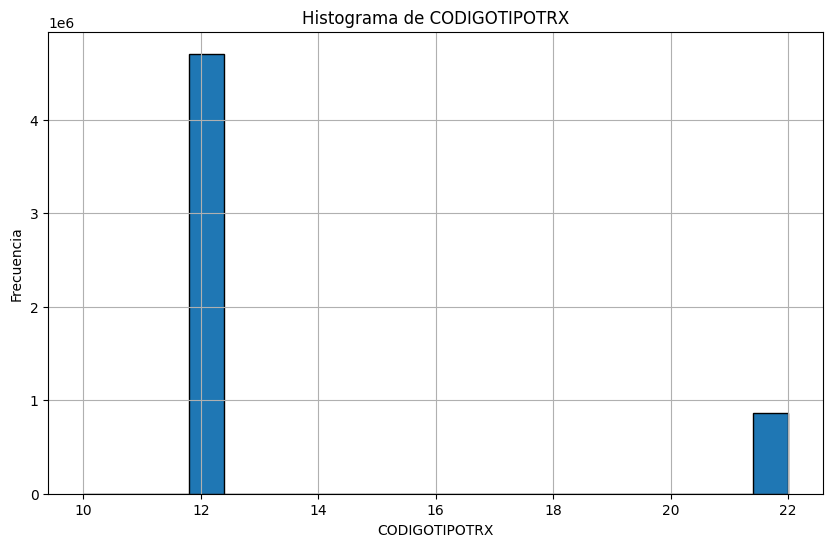

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(selected_df['CODIGOTIPOTRX'], bins=20, edgecolor='black')
plt.title('Histograma de CODIGOTIPOTRX')
plt.xlabel('CODIGOTIPOTRX')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [ ]:
selected_df.value_counts('CODIGOTIPOTRX', dropna=False)


CODIGOTIPOTRX
12.0    4703388
22.0     863914
10.0       2325
Name: count, dtype: int64

Descripción de tablas:
> 2 valores existentes, 12 y 22. 12: boleto comun, 22: trasbordo. Influye en el monto.

vemos que también hay 10

In [ ]:
selected_df.value_counts('ID_COMBINACION', dropna=False)

ID_COMBINACION
NaN    4705713
1.0     828413
2.0      33161
3.0       2340
Name: count, dtype: int64

descripción tablas deID_COMBINACIÓN
> 5 valores distintos (blanco,1,2,3,71). localidades que puede tener varios trasbordos (con cada cantidad se hace descuentos)en que parte del trasbordo estas... sj 3 trasbordos... 

indica la cantidad de trasbordos, son correctos los datos

In [ ]:
selected_df.value_counts('CODIGOCONTRATO', dropna=False)

CODIGOCONTRATO
621.0    3749759
602.0    1817426
624.0       2325
106.0        116
619.0          1
Name: count, dtype: int64

explicación de la tabla
> Tipo de boleto (beneficio, descuento). asociado a la tarjeta

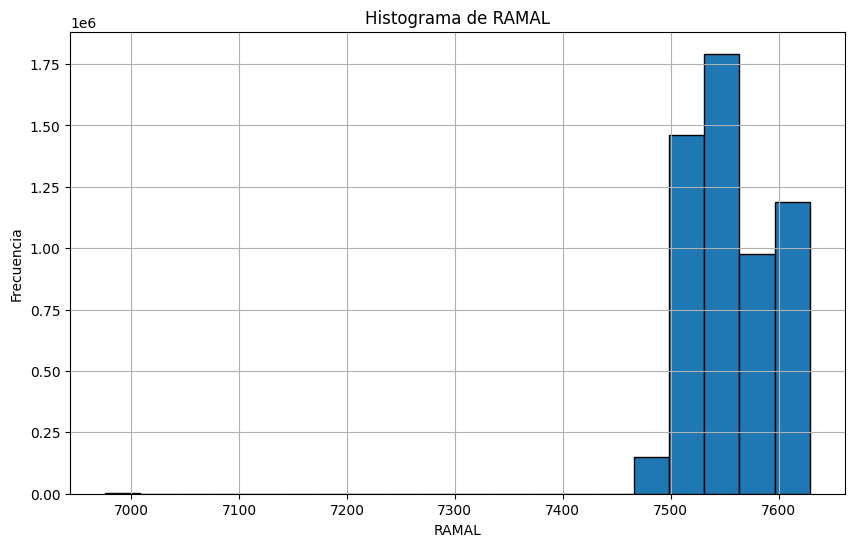

In [ ]:
# mostrar histograma de ramal y luego contar nan
plt.figure(figsize=(10, 6))
plt.hist(selected_df['RAMAL'], bins=20, edgecolor='black')
plt.xlabel('RAMAL')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Histograma de RAMAL')
plt.show()

Descripción
>EXTENSIONES. LA DESCRIPCION ESTA EN LA TABLA DE LAS LINEAS(EMPRESAS)

# Tabla GPS

## Carga de datos


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import os

path_gps = os.path.join('datasets', 'GPS_SAN_JUAN_022024.csv')


In [20]:

gps_rows = 28000

gps_column_types = {
    "CODIGOENTIDAD": "int64",
    "IDLINEA": "int64",
    "INTERTNO": "float64",
    "C_LD_ID (RAMAL)": "int64",
    "FILE_ID": "float64",
    "DTSN": "float64",
    "DATE_TIME": "datetime64[ns]",
    "TYPE": "int64",
    "DIRECTION": "int64",
    "LONGITUDE": "float64",
    "LATITUDE": "float64",
    "VELOCITY": "float64",
    "DISTANCE": "float64",
    "STATUS": "int64",
    "CONTROL_POINT": "int64"
}



In [21]:
def load_data_GPS(path, columns):
    return pd.read_csv(
        path,
        dtype=columns,
        delimiter=';',
        on_bad_lines='skip',
        decimal=',',
        )


In [22]:
gps_df = load_data_GPS(path_gps, gps_column_types)
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850268 entries, 0 to 2850267
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   codigoentidad    int64  
 1   idlinea          float64
 2   interno          int64  
 3   c_ld_Id          int64  
 4   file_id          int64  
 5   FILENAME         object 
 6   record_type      int64  
 7   dtsn             int64  
 8   date_time        object 
 9   TYPE             int64  
 10  direction        int64  
 11  device           int64  
 12  longitude        object 
 13  latitude         object 
 14  velocity         int64  
 15  distance         int64  
 16  status           int64  
 17  c_control_point  int64  
dtypes: float64(1), int64(13), object(4)
memory usage: 391.4+ MB


In [23]:
gps_df.head()

,codigoentidad,idlinea,interno,c_ld_Id,file_id,FILENAME,record_type,dtsn,date_time,TYPE,direction,device,longitude,latitude,velocity,distance,status,c_control_point
0,251,NaN,21,0,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929896,02/02/2024 09:55:35,5,255,4344,-68.54042,-31.54441,0,0,64,1
1,251,NaN,21,0,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929899,02/02/2024 09:55:42,3,255,4344,-68.54042,-31.54441,0,0,8,2
2,251,3381.0,21,7555,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929903,02/02/2024 09:55:47,7,255,4344,-68.54042,-31.54441,0,0,64,3
3,251,3381.0,21,7555,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929905,02/02/2024 09:59:43,3,1,4344,-68.54028,-31.54454,9,0,8,4
4,251,3381.0,21,7555,336411229,LSR_0251_339_00021_0000004344_04682_20240202_1...,220,2929906,02/02/2024 10:03:43,3,1,4344,-68.53884,-31.54263,37,1075,8,5


## Visualizaciones


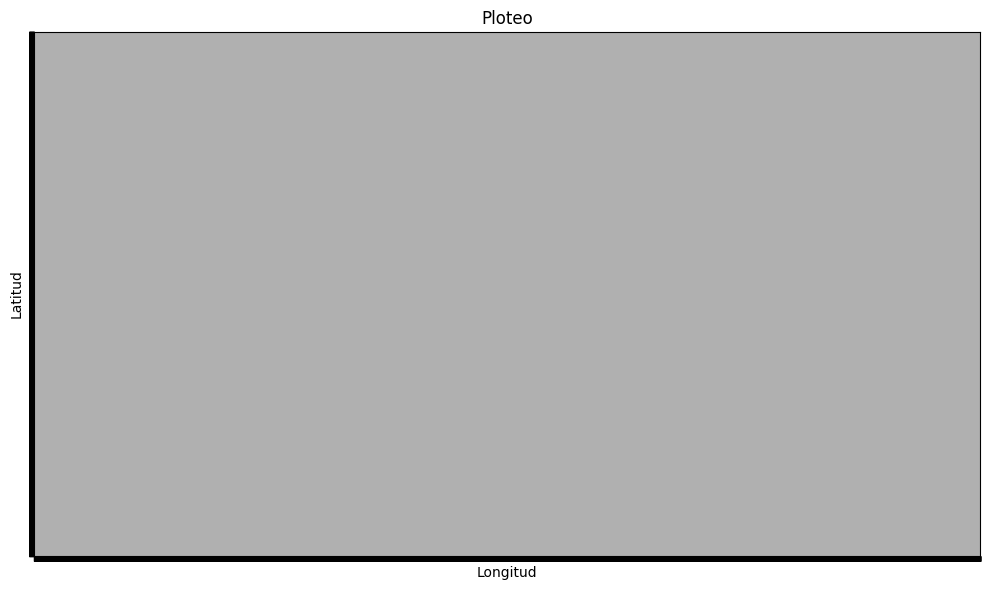

In [24]:
lat_min, lat_max = gps_df['latitude'].min(), gps_df['latitude'].max()
lon_min, lon_max = gps_df['longitude'].min(), gps_df['longitude'].max()


plt.figure(figsize=(10,6))
plt.scatter(gps_df['longitude'], gps_df['latitude'], c='blue', marker='o', alpha=0.3, s=10)
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)
plt.title('Ploteo')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.grid(True)
plt.show()
